In [51]:
import sqlite3
import pprint
import pandas as pd
import sys
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Replace the argument of sqlite3.connect() with the path to your database
conn = sqlite3.connect('/home/nathan/Programs/JupyterNotebooks/YelpData/database.sqlite')
c = conn.cursor()

pp = pprint.PrettyPrinter(indent=4)

In [3]:
table_names = [t[0] for t in c.execute('SELECT name FROM sqlite_master WHERE type="table" ORDER BY name;')]
print('Table Names\n' + '=' * 30 + '\n')
pp.pprint(table_names)

Table Names

[   'attribute',
    'business',
    'category',
    'checkin',
    'checkin_total',
    'elite_years',
    'friend',
    'hours',
    'photo',
    'review',
    'tip',
    'user']


In [4]:
business_col = [t[1] for t in c.execute('PRAGMA table_info("business");')]
user_col = [s[1] for s in c.execute('PRAGMA table_info("user");')]
review_col = [r[1] for r in c.execute('PRAGMA table_info("review");')]

print('{:<}'.format('Business') + ' Column Names\n' + '=' * 30 + '\n')
pp.pprint(business_col)
print('\n\n')
print('{:<}'.format('User') + ' Column Names\n' + '=' * 30 + '\n')
pp.pprint(user_col)
print('\n\n')
print('{:<}'.format('Review') + ' Column Names\n' + '=' * 30 + '\n')
pp.pprint(review_col)

Business Column Names

[   'id',
    'name',
    'neighborhood',
    'address',
    'city',
    'state',
    'postal_code',
    'latitude',
    'longitude',
    'stars',
    'review_count',
    'is_open']



User Column Names

[   'id',
    'name',
    'review_count',
    'yelping_since',
    'useful',
    'funny',
    'cool',
    'fans',
    'average_stars',
    'compliment_hot',
    'compliment_more',
    'compliment_profile',
    'compliment_cute',
    'compliment_list',
    'compliment_note',
    'compliment_plain',
    'compliment_cool',
    'compliment_funny',
    'compliment_writer',
    'compliment_photos']



Review Column Names

[   'id',
    'stars',
    'date',
    'text',
    'useful',
    'funny',
    'cool',
    'business_id',
    'user_id']


In [5]:
temp = [d for d in c.execute('SELECT * FROM business LIMIT 5;')]
business_example = pd.DataFrame(temp, columns = business_col)
del temp
print('Example Businesses\n' + '=' * 30 + '\n')
display(business_example)

Example Businesses



,id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open
0,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,,"328 Highway 7 E, Chalmers Gate 11, Unit 10",Richmond Hill,ON,L4B 3P7,43.8409,-79.3996,3.0,30,1
1,--7zmmkVg-IMGaXbuVd0SQ,Primal Brewery,,16432 Old Statesville Rd,Huntersville,NC,28078,35.4371,-80.8437,4.0,42,1
2,--8LPVSo5i0Oo61X01sV9A,Valley Bone and Joint Specialists,,"3941 E Baseline Rd, Ste 102",Gilbert,AZ,85234,33.3795,-111.7280,4.5,3,1
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,The Strip,3355 Las Vegas Blvd S,Las Vegas,NV,89109,36.1232,-115.1690,4.0,1389,1
4,--9QQLMTbFzLJ_oT-ON3Xw,Great Clips,,"1835 E Guadalupe Rd, Ste 106",Tempe,AZ,85283,33.3617,-111.9100,3.0,9,1


In [6]:
temp = [d for d in c.execute('SELECT * FROM user LIMIT 5;')]
user_example = pd.DataFrame(temp, columns = user_col)
del temp
print('Example Users\n' + '=' * 30 + '\n')
display(user_example)

Example Users



,id,name,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,---1lKK3aKOuomHnwAkAow,Monera,245,2007-06-04 00:00:00,67,22,9,15,3.97,2,3,2,1,0,5,9,9,9,9,0
1,---94vtJ_5o_nikEs6hUjg,Joe,2,2016-05-27 00:00:00,0,0,0,0,5.00,0,0,0,0,0,0,0,0,0,0,0
2,---cu1hq55BP9DWVXXKHZg,Jeb,57,2009-04-18 00:00:00,34,14,0,0,3.79,0,0,0,0,0,3,2,0,0,0,0
3,---fhiwiwBYrvqhpXgcWDQ,Jed,8,2011-04-20 00:00:00,2,3,1,0,2.78,0,0,0,0,0,0,0,0,0,0,0
4,---PLwSf5gKdIoVnyRHgBA,Rae,2,2015-07-31 00:00:00,1,0,0,0,4.00,0,0,0,0,0,0,0,0,0,0,0


In [7]:
temp = [d for d in c.execute('SELECT * FROM review LIMIT 5;')]
review_example = pd.DataFrame(temp, columns = review_col)
del temp
print('Example Reviews\n' + '=' * 30 + '\n')
display(review_example)

Example Reviews



,id,stars,date,text,useful,funny,cool,business_id,user_id
0,----X0BIDP9tA49U3RvdSQ,4,2014-02-17 00:00:00,"Red, white and bleu salad was super yum and a ...",0,0,0,Ue6-WhXvI-_1xUIuapl0zQ,gVmUR8rqUFdbSeZbsg6z_w
1,---0hl58W-sjVTKi5LghGw,4,2016-07-24 00:00:00,Ate the momos during the momo crawl.. Was the ...,0,0,0,Ae4ABFarGMaI5lk1i98A0w,Y6qylbHq8QJmaCRSlKdIog
2,---3OXpexMp0oAg77xWfYA,5,2012-04-07 00:00:00,Pizza here made my night... Good people and gr...,2,0,0,lKq4Qsz13FDcAVgp49uukQ,SnXZkRN9Yf060pNTk1HMDg
3,---65iIIGzHj96QnOh89EQ,5,2015-09-11 00:00:00,Great brisket sandwich as claimed. Weird that ...,0,0,0,6nKR80xEGHYf2UxAe_Cu_g,VcmSgvslHAhqWoEn16wjjw
4,---7WhU-FtzSUOje87Y4uw,5,2016-01-22 00:00:00,"Interesting food, great atmosphere, and great ...",1,1,1,Z_mJYg3vi8cPZHa1J4BALw,NKF9v-r0jd1p0JVi9h2T1w


In [8]:
# list of tuples (review id, business id, user id)
reviews = [id for id in c.execute('SELECT id, business_id, user_id FROM review;')]
business_IDs = {id[0] for id in c.execute('SELECT id FROM business;')}
user_IDs = {id[0] for id in c.execute('SELECT id from user')}

In [9]:
print('Reviews    : {:12,}\nBusinesses : {:12,}\nUsers      : {:12,}'.format(len(reviews), len(business_IDs), len(user_IDs)))

Reviews    :    4,736,897
Businesses :      156,639
Users      :    1,183,362


In [10]:
#reviews

In [11]:
#business_IDs

In [12]:
#user_IDs

In [13]:
relevant_reviews = 0
review_total = 0

for r in reviews:
    if r[1] in business_IDs:
        relevant_reviews += 1
    review_total += 1
    
print('Reviews for Relevant Businesses : {:10,}'.format(relevant_reviews))
print('Total Reviews                   : {:10,}'.format(review_total))
print('Relevant Review Fraction        : {:10.2f}%'.format(relevant_reviews / review_total * 100))

Reviews for Relevant Businesses :  4,736,897
Total Reviews                   :  4,736,897
Relevant Review Fraction        :     100.00%


In [29]:
relevant_reviews = 0
review_total = 0

for r in reviews:
    if r[2] in user_IDs:
        relevant_reviews += 1
    review_total += 1
    
print('Reviews for Relevant Users : {:10,}'.format(relevant_reviews))
print('Total Reviews              : {:10,}'.format(review_total))
print('Relevant Review Fraction   : {:10.2f}%'.format(relevant_reviews / review_total * 100))

Reviews for Relevant Users :  4,736,897
Total Reviews              :  4,736,897
Relevant Review Fraction   :     100.00%


Manually pull some business IDs from the visual representation of reviews, compare to the examples I pulled
directly from the database (see dataframes above). Then manually check those IDs against the business_IDs and user_IDs
sets. First few items from reviews list (review id, business id, user id):

- ('----X0BIDP9tA49U3RvdSQ',
  'Ue6-WhXvI-_1xUIuapl0zQ',
  'gVmUR8rqUFdbSeZbsg6z_w'),
- ('---0hl58W-sjVTKi5LghGw',
  'Ae4ABFarGMaI5lk1i98A0w',
  'Y6qylbHq8QJmaCRSlKdIog'),
- ('---3OXpexMp0oAg77xWfYA',
  'lKq4Qsz13FDcAVgp49uukQ',
  'SnXZkRN9Yf060pNTk1HMDg'),
- ('---65iIIGzHj96QnOh89EQ',
  '6nKR80xEGHYf2UxAe_Cu_g',
  'VcmSgvslHAhqWoEn16wjjw'),
- ('---7WhU-FtzSUOje87Y4uw',
  'Z_mJYg3vi8cPZHa1J4BALw',
  'NKF9v-r0jd1p0JVi9h2T1w')

Visually confirm that they are the same first 5 entries from the reviews table in the database, see above. CHECK

In [ ]:
"""
sample_business = ['Ue6-WhXvI-_1xUIuapl0zQ', 'Ae4ABFarGMaI5lk1i98A0w', 'lKq4Qsz13FDcAVgp49uukQ', '6nKR80xEGHYf2UxAe_Cu_g', 'Z_mJYg3vi8cPZHa1J4BALw']
sample_user = ['gVmUR8rqUFdbSeZbsg6z_w', 'Y6qylbHq8QJmaCRSlKdIog', 'SnXZkRN9Yf060pNTk1HMDg', 'VcmSgvslHAhqWoEn16wjjw', 'NKF9v-r0jd1p0JVi9h2T1w']

for b in sample_business:
    if b in business_IDs:
        print(True)
    else:
        print(False)
        
print('\n\n========================\n\n')

for u in sample_user:
    if u in user_IDs:
        print(True)
    else:
        print(False)
"""

In [15]:
friend_df = pd.read_sql_query('SELECT * FROM friend', conn)

In [16]:
print(sys.getsizeof(friend_df))
print(friend_df.shape)
print(friend_df.dtypes)

6295808724
(39846890, 2)
user_id      object
friend_id    object
dtype: object


In [28]:
display(friend_df)

,user_id,friend_id
0,lsSiIjAKVl-QRxKjRErBeg,M19NwFwAXKRZzt8koF11hQ
1,lsSiIjAKVl-QRxKjRErBeg,QRcMZ8pJJBBZaKubHOoMDQ
2,lsSiIjAKVl-QRxKjRErBeg,uimsjcHoBnXz1MAKGvB26w
3,lsSiIjAKVl-QRxKjRErBeg,v325XGF-l9da74ZMWEjyoA
4,lsSiIjAKVl-QRxKjRErBeg,vP5ajc1oGURsNvCXewsnDw
5,lsSiIjAKVl-QRxKjRErBeg,9nSutZOliE9Vg4XVGEx1HA
6,lsSiIjAKVl-QRxKjRErBeg,--2vR0DIsmQ6WfcSzKWigw
7,lsSiIjAKVl-QRxKjRErBeg,LDJ51sk5SJXovRI2yQZimA
8,lsSiIjAKVl-QRxKjRErBeg,3R_dB9VQ_D3WPJEw7pmorA
9,lsSiIjAKVl-QRxKjRErBeg,8drMKNHWavs2g6uf0pLtvg


In [19]:
userswithfriends = set()
for user in friend_df['user_id']:
    userswithfriends.add(user)

In [20]:
friends = set()
for friend in friend_df['friend_id']:
    friends.add(friend)

In [21]:
print('Users with Friends : {:12,}'.format(len(userswithfriends)))
print('Unique Friends     : {:12,}'.format(len(friends)))

Users with Friends :      675,411
Unique Friends     :    8,833,584


In [22]:
relevant_userswithfriends = 0

for user in userswithfriends:
    if user in user_IDs:
        relevant_userswithfriends += 1

In [23]:
relevant_friends = 0

for friend in friends:
    if friend in user_IDs:
        relevant_friends += 1

In [24]:
print('Users with Friends in User Table : {:12,}'.format(relevant_userswithfriends))
print('Users with Friends Total         : {:12,}'.format(len(userswithfriends)))
print('                                 : {:12.2f}%\n'.format(relevant_userswithfriends / len(userswithfriends) * 100))
print('Unique Friends in User Table     : {:12,}'.format(relevant_friends))
print('Unique Friends Total             : {:12,}'.format(len(friends)))
print('                                 : {:12.2f}%'.format(relevant_friends / len(friends) * 100))

Users with Friends in User Table :      675,411
Users with Friends Total         :      675,411
                                 :       100.00%

Unique Friends in User Table     :      527,609
Unique Friends Total             :    8,833,584
                                 :         5.97%


In [25]:
user_df = pd.read_sql_query('SELECT * FROM user', conn)

In [26]:
display(user_df)

,id,name,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,---1lKK3aKOuomHnwAkAow,Monera,245,2007-06-04 00:00:00,67,22,9,15,3.97,2,3,2,1,0,5,9,9,9,9,0
1,---94vtJ_5o_nikEs6hUjg,Joe,2,2016-05-27 00:00:00,0,0,0,0,5.00,0,0,0,0,0,0,0,0,0,0,0
2,---cu1hq55BP9DWVXXKHZg,Jeb,57,2009-04-18 00:00:00,34,14,0,0,3.79,0,0,0,0,0,3,2,0,0,0,0
3,---fhiwiwBYrvqhpXgcWDQ,Jed,8,2011-04-20 00:00:00,2,3,1,0,2.78,0,0,0,0,0,0,0,0,0,0,0
4,---PLwSf5gKdIoVnyRHgBA,Rae,2,2015-07-31 00:00:00,1,0,0,0,4.00,0,0,0,0,0,0,0,0,0,0,0
5,---udAKDsn0yQXmzbWQNSw,Carolyn,43,2014-07-12 00:00:00,1,0,0,1,3.84,0,0,0,0,0,0,0,0,0,0,0
6,--0kuuLmuYBe3Rmu0Iycww,Talia,26,2010-03-08 00:00:00,10,2,0,2,3.48,0,0,0,0,0,0,0,0,0,0,0
7,--0RtXvcOIE4XbErYca6Rw,Ryan,2,2013-05-30 00:00:00,0,0,0,0,4.50,0,0,0,0,0,0,0,0,0,0,0
8,--0sXNBv6IizZXuV-nl0Aw,Joe,1,2013-01-09 00:00:00,0,0,0,0,5.00,0,0,0,0,0,0,0,0,0,0,0
9,--0WZ5gklOfbUIodJuKfaQ,Scott,7,2013-02-19 00:00:00,0,0,0,0,4.11,0,0,0,0,0,0,0,0,0,0,0


In [32]:
user_df.shape

(1183362, 20)

In [34]:
user_friendcounts = defaultdict(int)
for row in friend_df.itertuples():
    user_friendcounts[row[1]] += 1

In [35]:
user_friendcounts

defaultdict(int,
            {'lsSiIjAKVl-QRxKjRErBeg': 1256,
             'om5ZiponkpRqUNa3pVPiRg': 5163,
             '-lGwMGHMC_XihFJNKCJNRg': 662,
             'D-ydMTPGWXTVm4_jjp0k9g': 272,
             'PcvbBOCOcs6_suRDH7TSTg': 1049,
             'uXjR2GhCAYhqxVr21aC4vQ': 72,
             'N2arP_u4sMGLgOZhA6ZFoQ': 78,
             'YHJIMK_zVH_VY6HCY6bYvg': 31,
             'g3V76Ja0XgWS1rqx0gxL_A': 66,
             'VTL4Dep5p7XrrOtgnXdEIQ': 147,
             'Wc5L6iuvSNF5WGBlqIO8nw': 2915,
             'gGdg9LOh61iUX1ui6suS0w': 38,
             'UUVbV8XmTzNksBOPaiO3pA': 902,
             'Dd-TkEszFMkSF-vRih51fQ': 609,
             'uxKSnOVAoEj4I6X9YhLBlg': 71,
             'ibvH1Y7Rh_tstiWgH0OFTA': 315,
             'NUEQYD6T-ixWejImJYlDHQ': 80,
             'tjufYqU4PWkP2j6vAFsCFw': 148,
             'kyhxBq6x_Pl1GEgq0g-CFA': 149,
             'RBqsD06DqXJnfYxhfx_v-A': 106,
             'HnfktbfTW1vt7ZDZn5MSRQ': 66,
             '-XgVXGJnOnW0kQEol6O3Pg': 62,
             'r5aSka

In [36]:
user_reviewcount = dict(zip(user_df['id'], user_df['review_count']))

In [37]:
user_reviewcount

{'---1lKK3aKOuomHnwAkAow': 245,
 '---94vtJ_5o_nikEs6hUjg': 2,
 '---cu1hq55BP9DWVXXKHZg': 57,
 '---fhiwiwBYrvqhpXgcWDQ': 8,
 '---PLwSf5gKdIoVnyRHgBA': 2,
 '---udAKDsn0yQXmzbWQNSw': 43,
 '--0kuuLmuYBe3Rmu0Iycww': 26,
 '--0RtXvcOIE4XbErYca6Rw': 2,
 '--0sXNBv6IizZXuV-nl0Aw': 1,
 '--0WZ5gklOfbUIodJuKfaQ': 7,
 '--104qdWvE99vaoIsj9ZJQ': 3,
 '--1av6NdbEbMiuBr7Aup9A': 9,
 '--1mPJZdSY9KluaBYAGboQ': 5,
 '--26jc8nCJBy4-7r3ZtmiQ': 2,
 '--2bpE5vyR-2hAP7sZZ4lA': 23,
 '--2HUmLkcNHZp0xw6AMBPg': 28,
 '--2vR0DIsmQ6WfcSzKWigw': 1153,
 '--3B8LdT1NCD-bPkwS5-5g': 4,
 '--3l8wysfp49Z2TLnyT0vg': 111,
 '--3oMd6gjXpAzhjLBrsVCQ': 2,
 '--3WaS23LcIXtxyFULJHTA': 213,
 '--41c9Tl0C9OGewIR7Qyzg': 239,
 '--44NNdtngXMzsxyN7ju6Q': 2,
 '--4q8EyqThydQm-eKZpS-A': 400,
 '--4rAAfZnEIAKJE80aIiYg': 25,
 '--4ww39MLTS1SBRmCrSmww': 3,
 '--56mD0sm1eOogphi2FFLw': 211,
 '--56y1InAvNoQOD6YYrhVQ': 3,
 '--5BsHjOVLIGoTwjol-V2w': 1,
 '--5Dnq-kuMq5bqvlgDKORQ': 7,
 '--5ihAtBE4kI5Gch9383qA': 11,
 '--5ox2OhSAADcB_uAEOYFw': 2,
 '--5XzJ2pRsVVJiJU

In [39]:
review_counts = []
friend_counts = []
for item in user_friendcounts.items():
    friend_counts.append(item[1])
    review_counts.append(user_reviewcount[item[0]])

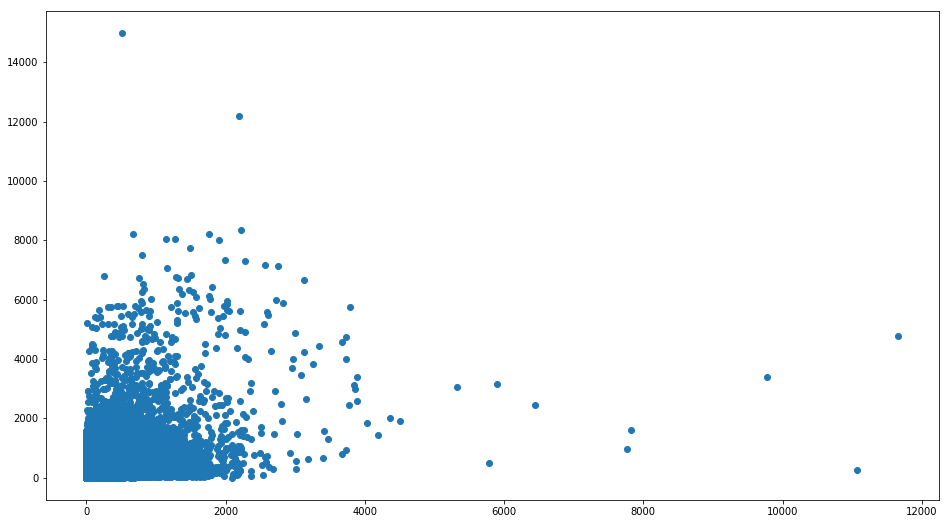

In [54]:
fig, axes = plt.subplots(figsize=(16, 9))
axes.scatter(review_counts, friend_counts)
#axes.set_xlim((0, 2000))
#axes.set_ylim((0, 6000))
plt.show()

In [53]:
np.corrcoef(review_counts, friend_counts)[0, 1]

0.47352937279119073

In [55]:
elite_df = pd.read_sql_query('SELECT * from elite_years', conn)
print(elite_df.shape)
elite_df.describe

(180563, 2)


<bound method NDFrame.describe of                        user_id  year
0       lsSiIjAKVl-QRxKjRErBeg  2014
1       lsSiIjAKVl-QRxKjRErBeg  2016
2       lsSiIjAKVl-QRxKjRErBeg  2013
3       lsSiIjAKVl-QRxKjRErBeg  2011
4       lsSiIjAKVl-QRxKjRErBeg  2012
5       lsSiIjAKVl-QRxKjRErBeg  2015
6       lsSiIjAKVl-QRxKjRErBeg  2010
7       lsSiIjAKVl-QRxKjRErBeg  2017
8       om5ZiponkpRqUNa3pVPiRg  2014
9       om5ZiponkpRqUNa3pVPiRg  2017
10      om5ZiponkpRqUNa3pVPiRg  2011
11      om5ZiponkpRqUNa3pVPiRg  2012
12      om5ZiponkpRqUNa3pVPiRg  2015
13      om5ZiponkpRqUNa3pVPiRg  2009
14      om5ZiponkpRqUNa3pVPiRg  2013
15      om5ZiponkpRqUNa3pVPiRg  2007
16      om5ZiponkpRqUNa3pVPiRg  2016
17      om5ZiponkpRqUNa3pVPiRg  2006
18      om5ZiponkpRqUNa3pVPiRg  2010
19      om5ZiponkpRqUNa3pVPiRg  2008
20      D-ydMTPGWXTVm4_jjp0k9g  2016
21      D-ydMTPGWXTVm4_jjp0k9g  2017
22      PcvbBOCOcs6_suRDH7TSTg  2017
23      PcvbBOCOcs6_suRDH7TSTg  2016
24      N2arP_u4sMGLgOZhA6ZFoQ  2017
25  